

# Project: Investigate a Dataset - Medical Appointment No Shows


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset shows 14 characteristics of 110.527 medical appointments, the most important one if the patient show-up or no-show to the appointment. 

#### variables description:
<dl>
    <dt>01 - PatientId</dt>
    <dd>Identification of a patient</dd>
  <dt>02 - AppointmentID</dt>
    <dd>Identification of each appointment</dd>
 <dt>03 - Gender</dt>
    <dd>Male or Female. Female is the greater proportion, women take way more care of their health in comparison to men.</dd>
 <dt>04 - DataMarcacaoConsulta</dt>
    <dd>The day of the actual appointment, when they have to visit the doctor.</dd>
  <dt>05 - DataAgendamento</dt>
    <dd>The day someone called or registered the appointment; this is before the appointment of course.</dd>
  <dt>06 - Age</dt>
    <dd>How old the patient is.</dd>
 <dt>07 - Neighbourhood</dt>
    <dd>Where the appointment takes place.</dd>
 <dt>08 - Scholarship</dt>
    <dd>True or False. Observation: this is a broad topic, consider reading this article <a href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia" target="_blank">here</a>.</dd>
  <dt>09 - Hipertension</dt>
    <dd>True or False</dd>
 <dt>10 - Diabetes</dt>
    <dd>True or False</dd>
<dt>11 - Alcoholism</dt>
    <dd>True or False</dd>
 <dt>12 - Handcap</dt>
    <dd>True or False</dd>
<dt>13 - SMS_received</dt>
    <dd>1 or more messages sent to the patient.</dd>
  <dt>14 - No-show</dt>
    <dd>True or False.</dd>
</dl>

### Question(s) for Analysis
<ol>
   <li>
       Which gender show up to appointments more, female or male?
   </li>
    <li>
Would sending SMS message to patients increase the possibility to show up?
         </li>
    <li>
 Does Diabetes and Hypertension Impedes patients from showing up? 
         </li>
    <li>
Which neighbourhood shows the most show-up?
         </li>
    <li>
 Is there a relationship between age and showing-up?
         </li>
    </ol>

In [3]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

Reading the csv file:

In [4]:
df1 = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df1.shape

(110527, 14)

In [7]:
df1.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning


#### Rename columns

In [8]:
# format with underscores between two words, remove no-needed words
df1.rename(columns={'PatientId': 'Patient_Id',
'AppointmentID': 'Appointment_ID',
'ScheduledDay': 'Scheduled_Day',
'AppointmentDay': 'Appointment',
'No-show': 'No_show',
'Hipertension':'Hypertension'

}, inplace=True)


In [9]:
# lowercase names
df1.rename(columns=lambda x: x.strip().lower(), inplace=True)

# confirm changes
df1.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Filter, Drop Nulls, Dedupe

In [10]:
df1.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


the minimum value of age is -1 which doesn't make sense so we drop it

In [11]:
df1.query('age==-1')

,patient_id,appointment_id,gender,scheduled_day,appointment,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df1.drop(index= 99832 , inplace= True)

In [13]:
df1.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

But handcap should have just 0,1 values as false,true , so we drop rows that have handcap value other than 0 or 1

In [14]:
#df1 = df[df['handcap'].isin([0, 1])]

In [15]:
df1.isnull().sum()

patient_id        0
appointment_id    0
gender            0
scheduled_day     0
appointment       0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

There's no null data

In [16]:
df1.duplicated().sum()

0

Theres no duplicates rows

In [17]:
df1.patient_id.nunique()

62298

In [18]:
df1.patient_id.duplicated().sum()

48228

In [19]:
df1['appointment_id'].nunique()

110526

We notice There are duplicates in patient_id, we dont want the investgation conclusion to be based on the behavior of specific people, so as the behavior of single person who have many records doesn't affect the connclusion, we will keep one record of each show state for every patient_id.

In [20]:
df1.drop_duplicates(['patient_id','no_show'], inplace = True)

In [21]:
df1.shape

(71816, 14)

In [22]:
df1.to_csv('no_show_appointments_renamed.csv',index=False)

### Fixing Data Types

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      71816 non-null  float64
 1   appointment_id  71816 non-null  int64  
 2   gender          71816 non-null  object 
 3   scheduled_day   71816 non-null  object 
 4   appointment     71816 non-null  object 
 5   age             71816 non-null  int64  
 6   neighbourhood   71816 non-null  object 
 7   scholarship     71816 non-null  int64  
 8   hypertension    71816 non-null  int64  
 9   diabetes        71816 non-null  int64  
 10  alcoholism      71816 non-null  int64  
 11  handcap         71816 non-null  int64  
 12  sms_received    71816 non-null  int64  
 13  no_show         71816 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


In [24]:
df1.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
np.iinfo("int8") 

iinfo(min=-128, max=127, dtype=int8)

The maximum value of age is 115 (from describe method) so int8 is enough for age.

In [26]:
df1["age"] = df1["age"].astype("int8")

In [27]:
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

3.4028235e+38 s greater than the max value of patient_id so we convert its type to float32

In [28]:
df1["patient_id"] = df1["patient_id"].astype("float32")

In [29]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

  scheduled_day , appointment are dates so we convert object type to datetime

In [30]:
 df1['scheduled_day'] = pd.to_datetime(df1['scheduled_day'])
df1['appointment'] = pd.to_datetime(df1['appointment'])

columns that have unique will be changed to category type    	 

In [31]:
df1["gender"] = df1["gender"].astype("category")
df1["hypertension"] = df1["hypertension"].astype("category")
df1["diabetes"] = df1["diabetes"].astype("category")
df1["alcoholism"] = df1["alcoholism"].astype("category")
df1["sms_received"] = df1["sms_received"].astype("category")
df1["handcap"] = df1["handcap"].astype("category")
df1["scholarship"] = df1["scholarship"].astype("category")

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   patient_id      71816 non-null  float32            
 1   appointment_id  71816 non-null  int64              
 2   gender          71816 non-null  category           
 3   scheduled_day   71816 non-null  datetime64[ns, UTC]
 4   appointment     71816 non-null  datetime64[ns, UTC]
 5   age             71816 non-null  int8               
 6   neighbourhood   71816 non-null  object             
 7   scholarship     71816 non-null  category           
 8   hypertension    71816 non-null  category           
 9   diabetes        71816 non-null  category           
 10  alcoholism      71816 non-null  category           
 11  handcap         71816 non-null  category           
 12  sms_received    71816 non-null  category           
 13  no_show         71816 non-null

<a id='eda'></a>
## Exploratory Data Analysis


#### Research Question 1: Which gender show up to appointments more, female or male? 

Text(0, 0.5, 'Number of Appointments')

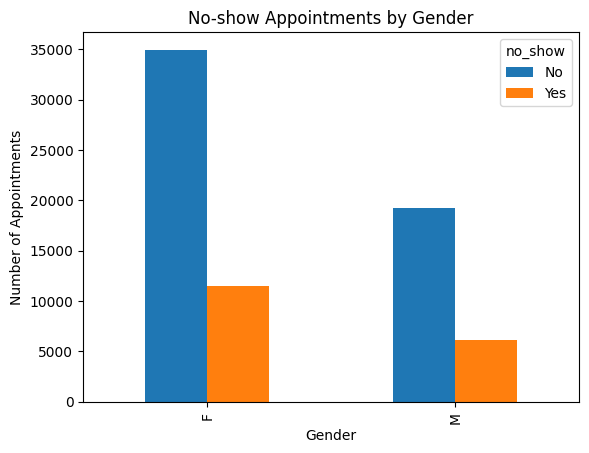

In [53]:

    ct = pd.crosstab(df1["gender"], df1['no_show'])
    # stacked bar plot
    ax= ct.plot(kind='bar')
    ax.set_title('No-show Appointments by Gender')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Number of Appointments')

the bar chart was not the best way to notice the gender which show up more, so we calculate the percentage of showing up for each gender:

In [54]:
df1.query("gender == 'F'").shape

(46466, 14)

In [55]:
df1.query("gender == 'M'").shape

(25350, 14)

In [56]:

  # Calculate the number of females and males who show up
female_no_show = df1[(df1['gender'] == 'F') & (df1['no_show'] == 'No')].shape[0]
male_no_show = df1[(df1['gender'] == 'M') & (df1['no_show'] == 'No')].shape[0]

# Calculate the percentage of females and males who show up
female_percentage = (female_no_show / 46466) * 100
male_percentage = (male_no_show / 25350) * 100

Text(0.5, 1.0, 'Female Show-Up Percentage')

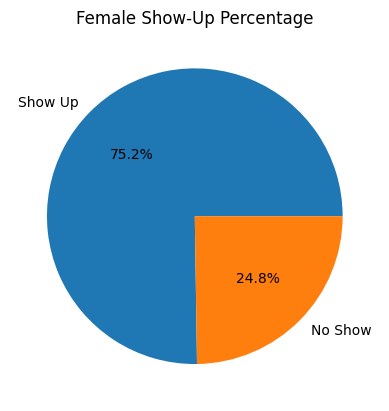

In [57]:
plt.pie([female_percentage, 100 - female_percentage], labels=['Show Up', 'No Show'], autopct='%1.1f%%')
plt.title('Female Show-Up Percentage')


Text(0.5, 1.0, 'Male Show-Up Percentage')

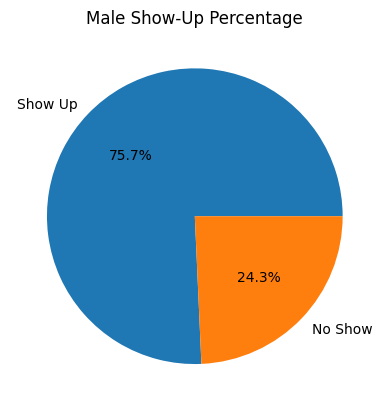

In [58]:
plt.pie([male_percentage, 100 - male_percentage], labels=['Show Up', 'No Show'], autopct='%1.1f%%')
plt.title('Male Show-Up Percentage')



#### Research Question 2: Would sending SMS message to patients increase the possibility to show up?

Text(0, 0.5, 'Number of Appointments')

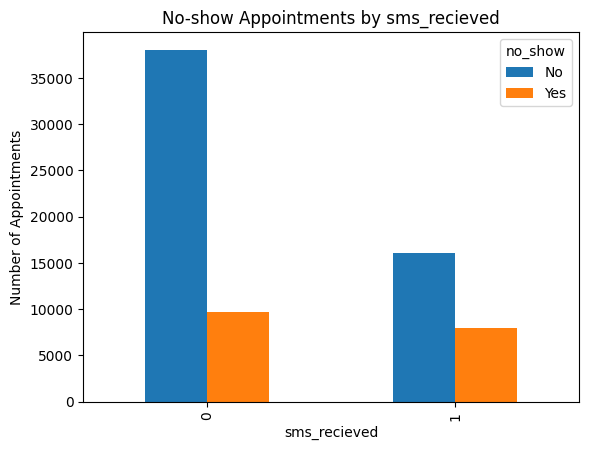

In [59]:
    ct = pd.crosstab(df1["sms_received"], df1['no_show'])
    ax= ct.plot(kind='bar')
    ax.set_title('No-show Appointments by sms_recieved')
    ax.set_xlabel('sms_recieved')
    ax.set_ylabel('Number of Appointments')

#### Research Question 3: Does Diabetes and Hypertension Impedes patients from showing up? 

Text(0, 0.5, 'Number of Appointments')

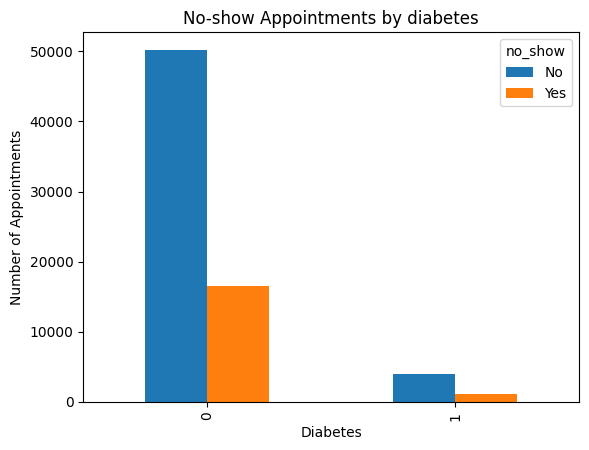

In [60]:
    ct = pd.crosstab(df1["diabetes"], df1['no_show'])
    ax= ct.plot(kind='bar')
    ax.set_title('No-show Appointments by diabetes')
    ax.set_xlabel('Diabetes')
    ax.set_ylabel('Number of Appointments')

Text(0, 0.5, 'Number of Appointments')

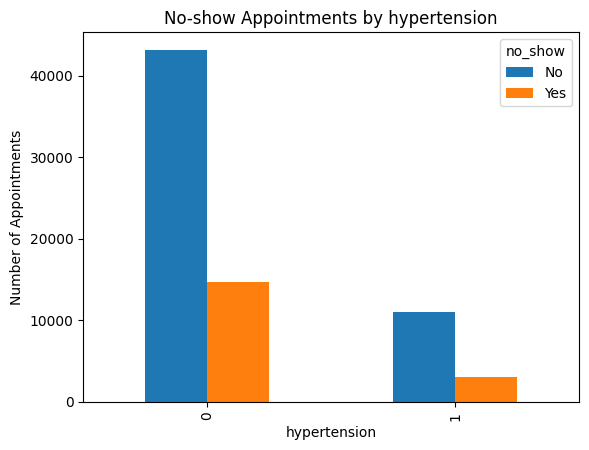

In [61]:
    ct = pd.crosstab(df1["hypertension"], df1['no_show'])
    ax = ct.plot(kind='bar')
    ax.set_title('No-show Appointments by hypertension')
    ax.set_xlabel('hypertension')
    ax.set_ylabel('Number of Appointments')

#### Research Question 4: Which neighbourhood shows the most show-up?

In [62]:

def filter_no_show(df,str):
    return df[df['no_show'] == str]

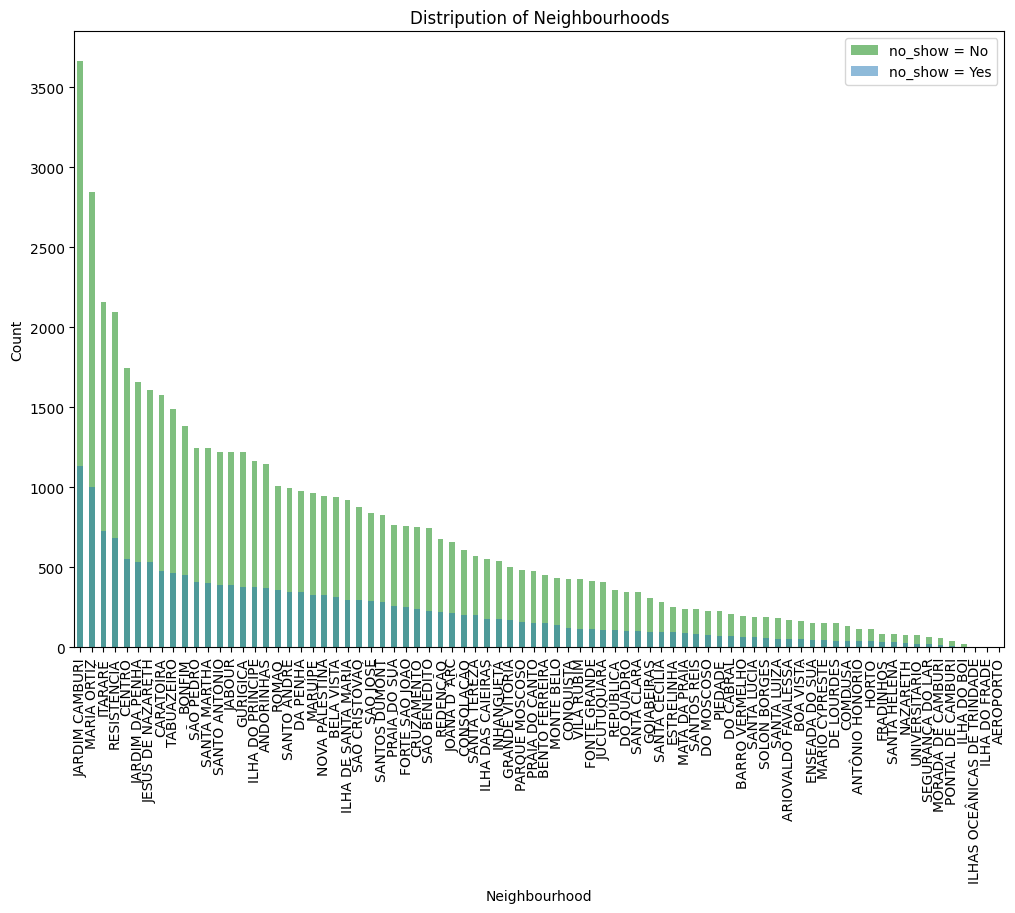

In [63]:
plt.figure(figsize=[12,8])
filtered_no_show_no = filter_no_show(df1, "No")
filtered_no_show_yes = filter_no_show(df1, "Yes")
filtered_no_show_no['neighbourhood'].value_counts().plot.bar(color='green',alpha=0.5,label='no_show = No')
filtered_no_show_yes['neighbourhood'].value_counts().plot.bar(alpha=0.5,label='no_show = Yes')
plt.legend()
plt.title('Distripution of Neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.show()


#### Research Question 5: Is there a relationship between age and showing-up?

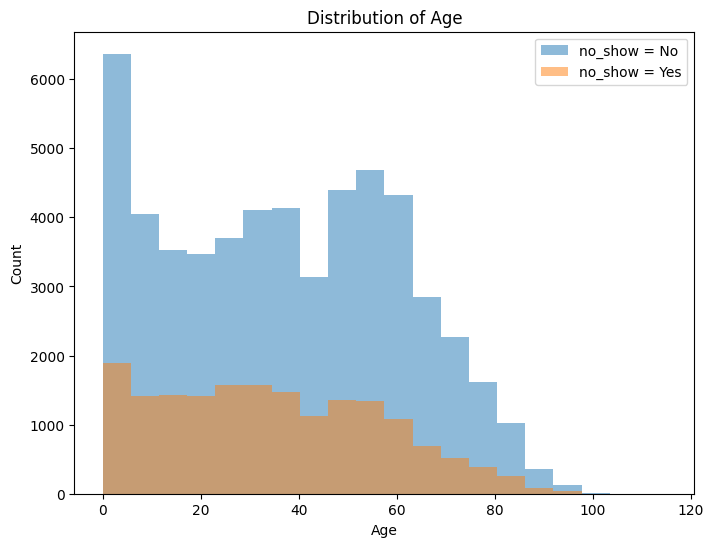

In [64]:
# Filter rows where 'No-show' is 'No' and plot histogram
plt.figure(figsize=(8, 6))
plt.hist(filtered_no_show_no['age'], bins=20, alpha=0.5, label='no_show = No')

# Filter rows where 'No-show' is 'Yes' and plot histogram
plt.hist(filtered_no_show_yes['age'], bins=20, alpha=0.5, label='no_show = Yes')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()

<a id='conclusions'></a>
## Conclusions

From the analysis and visualizations we created above, we can conclude this for our questions:
<ol>
   <li>
       Although females have more appointments records, but males have a greater percentage of showing up.
   </li>
    <li>
When SMS message were sent, the show up rate were greater than when it wasnt sent.
         </li>
    <li>
 Jardim  Camburi shows the largest show up.
         </li>
  <li>
   Younger age show the largest show up
         </li>
    </ol>
limitation of analysis:
the ambiguity of the data descriprion from the original source, for example i didn't understand what scholarship means? another example is handcap variable is described as (true or false) but it has numeric values in the dataset as 2,3,4.

In [98]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset-Appointments.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset-Appointments.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 663889 bytes to Investigate_a_Dataset-Appointments.html
